In [2]:
from model import get_bellasio2019
from mxlpy import scan, Simulator, make_protocol
import pandas as pd
import mxlbricks.names as n
import matplotlib.pyplot as plt
import numpy as np

INFO:2025-12-28 13:01:22,445:jax._src.xla_bridge:810: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory


In [2]:
pd.set_option('display.precision', 2)
get_bellasio2019().get_fluxes()

Ract_rate                  -6.31e-05
v_J_NADPH                   4.35e-01
v_J_ATP                     7.74e-01
v_gs                        4.93e-19
rubisco_carboxylase         1.78e-02
rubisco_oxygenase           1.42e-02
glycine_decarboxylase       1.42e-02
r1p_kinase                  7.56e-02
v_pgareduction              2.56e-02
v_carbohydrate_synthesis    1.71e-02
v_rpp                      -2.17e-02
v_co2_hydration            -5.62e-01
v_RLight                    1.00e-03
v_NADPH                     8.54e-02
v_ATP                       1.36e-01
CO2 dissolution             7.00e-02
CO2 stomatal diffusion      4.69e-02
dtype: float64

In [3]:
res = {}
for name, info in get_bellasio2019().get_derived_parameters().items():
    inp = []
    for arg in info.args:
        if arg in get_bellasio2019().get_parameter_names():
            inp.append(get_bellasio2019().get_parameter_values()[arg])
        elif arg in get_bellasio2019().get_fluxes():
            inp.append(get_bellasio2019().get_fluxes()[arg])
        elif arg in res.keys():
            inp.append(res[arg])

    if len(inp) == len(info.args):
        res[name] = info.fn(*inp)
    else:
        print(f"Problem with {name}")
        
print(pd.Series(res, name="Derived parameters"))

Et                  1.42
O2 (dissolved)      0.25
I2,0              645.00
I1,0              464.40
Name: Derived parameters, dtype: float64


## Figure 3

In [4]:
fig3_res = scan.steady_state(
    get_bellasio2019(),
    to_scan=pd.DataFrame({n.pfd(): [50, 75, 100, 150, 200, 500, 1000, 1500]})
)

  0%|          | 0/8 [00:00<?, ?it/s]/home/elouencorvestnew/Documents/mxl-bricks-elouen/.pixi/envs/dev/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1750742389890/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 105.872721389561 and h = 0.782409039950844, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1750742389890/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 101.914452752638 and h = 0.985915216486248, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1750742389890/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFail

In [5]:
fig3_res.variables

,CO2 (dissolved),HCO3,RUBP,3PGA,DHAP,ATP,NADPH,RU5P,Ract,J_NADPH,...,I1,f_cyc,I2,Y(II),J2,J1,f_pseudocyc,J_NADPH_steady,J_ATP_steady,gs_steady
PPFD,,,,,,,,,,,,,,,,,,,,,
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.48,0.0,21.50,NaN,NaN,NaN,NaN,NaN,NaN,0.01
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.22,0.0,32.25,NaN,NaN,NaN,NaN,NaN,NaN,0.01
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.96,0.0,43.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.44,0.0,64.50,NaN,NaN,NaN,NaN,NaN,NaN,0.01
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.92,0.0,86.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,154.80,0.0,215.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,309.60,0.0,430.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,464.40,0.0,645.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


TypeError: 'SteadyStateScan' object is not subscriptable

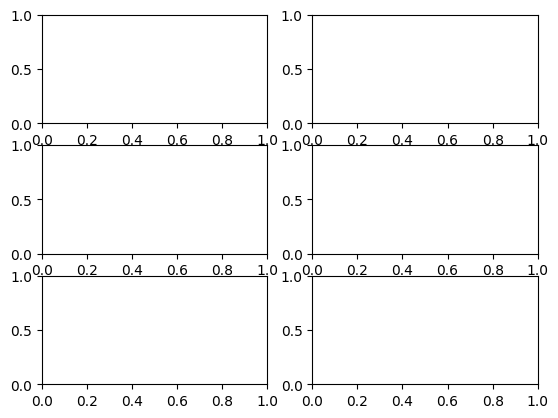

In [6]:
fig3, axs = plt.subplots(nrows=3, ncols=2)

axs[1, 0].plot(fig3_res["gs"])

## Figure 5

In [ ]:
m = get_bellasio2019()

s = Simulator(m)

s.simulate_time_course(np.arange(0, 100, 5))

var, flux = s.get_result()

[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1750742389890/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 91.2067821959384 and h = 1.43111453953334, the corrector convergence test failed repeatedly or with |h| = hmin.


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
m = get_bellasio2019()

s = Simulator(m)

s.update_parameters({
    n.pfd(): 50,
    "Ca": 350,
    "chi_beta": 0.8,
    "tau0": -0.12,
    "Ki": 3600,
    "Kd": 1200
})

s.simulate(105)

var, flux = s.get_result()

var.iloc[-1].sort_values(ascending=True)

[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1750742389890/work/sundials/src/cvodes/cvodes.c:8101][cvHandleFailure] At t = 92.0740288980435 and h = 1.86418171019501, the corrector convergence test failed repeatedly or with |h| = hmin.


TypeError: cannot unpack non-iterable Result object

In [14]:
m = get_bellasio2019()

s = Simulator(m)

s.update_parameters({
    n.pfd(): 1000,
    "Ca": 250
})

print(s.y0)

s.simulate(1)

res = s.get_result()

res

{'CO2 (dissolved)': 0.00396000396000396, 'HCO3': 0.1327, 'RUBP': 2, '3PGA': 4, 'DHAP': 4, 'ATP': 0.68, 'NADPH': 0.21, 'RU5P': 0.34, 'Ract': 1, 'J_NADPH': 0.1, 'J_ATP': 0.16, 'Ci': 260.0, 'gs': 0.334934046786077}


Result(value=Simulation(
  model=Model(
    _variables={
      'CO2 (dissolved)':
      Variable(
        initial_value=InitialAssignment(
          fn=<function co2_initial>, args=['Ca', 'Kh_co2']
        )
      ),
      'HCO3': Variable(initial_value=0.1327, unit=mole*Prefix(milli, m, -3, 10)/liter),
      'RUBP': Variable(initial_value=2, unit=mole*Prefix(milli, m, -3, 10)/liter),
      '3PGA': Variable(initial_value=4, unit=mole*Prefix(milli, m, -3, 10)/liter),
      'DHAP': Variable(initial_value=4, unit=mole*Prefix(milli, m, -3, 10)/liter),
      'ATP': Variable(initial_value=0.68, unit=mole*Prefix(milli, m, -3, 10)/liter),
      'NADPH': Variable(initial_value=0.21, unit=mole*Prefix(milli, m, -3, 10)/liter),
      'RU5P': Variable(initial_value=0.34, unit=mole*Prefix(milli, m, -3, 10)/liter),
      'Ract': Variable(initial_value=1),
      'J_NADPH': Variable(initial_value=0.1, unit=mole*Prefix(milli, m, -3, 10)/liter),
      'J_ATP': Variable(initial_value=0.16, unit=mole*Prefi